In [170]:
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 15 ms (started: 2023-03-30 21:48:30 +09:00)


In [171]:
import numpy as np
import math
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from numpy import savetxt
import pennylane as qml
import random

time: 0 ns (started: 2023-03-30 21:48:30 +09:00)


# Data Preparation

In [174]:
ntrain = 0 ; latent_dim = 15

time: 0 ns (started: 2023-03-30 21:48:30 +09:00)


In [175]:
def data(ntrain, latent_dim):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0  # normalize the data
    x_train_filter = np.where(y_train == ntrain)
    x_test_filter = np.where(y_test == ntrain)

    X_train = x_train[x_train_filter]
    X_test = x_test[x_test_filter]
    Y_train = y_train[x_train_filter]
    Y_test = y_test[x_test_filter]

    X_train = tf.image.resize(X_train[:], (256, 1)).numpy()
    X_test = tf.image.resize(X_test[:], (256, 1)).numpy()
    X_train, X_test = tf.squeeze(X_train).numpy(), tf.squeeze(X_test).numpy()
    
    x_train = tf.image.resize(x_train[:], (256, 1)).numpy()
    x_test = tf.image.resize(x_test[:], (256, 1)).numpy()
    x_train, x_test = tf.squeeze(x_train).numpy(), tf.squeeze(x_test).numpy()
    
    center = qml.numpy.zeros(latent_dim, requires_grad=True)
    center_train = np.tile(center,(len(X_train),1))

    return x_train, y_train, x_test, y_test, X_train, X_test, Y_train, Y_test, center_train
    print('x_train:',x_train.shape)
    print('x_test:',x_test.shape)
    print('X_train:',X_train.shape)
    print('X_test:',X_test.shape)

time: 0 ns (started: 2023-03-30 21:48:30 +09:00)


In [176]:
x_train, y_train, x_test, y_test, X_train, X_test, Y_train, Y_test, center_train = data(ntrain, latent_dim)

time: 438 ms (started: 2023-03-30 21:48:30 +09:00)


# Training

In [177]:
import os

# Change the current working directory to the desired directory
os.chdir('C:/Users/user1/Quantum/qsvdd_VQOCC/code')

%run ./Angular_hybrid.py
%run ./unitary.py
%run ./embedding.py
%run ./QCNN_circuit.py
%run ./Training.py

time: 15 ms (started: 2023-03-30 21:48:30 +09:00)


In [178]:
train_Xdata = X_train
train_Ydata = center_train
conv_filter = 'U_VQOCC'
num_params_conv = 150
data_encoding = 'Amplitude'
circuit_type = 'QCNN'
cost_func = 'qae'
measure_basis = 'Z'

loss_history, est_params, param_history = circuit_training(X_train=train_Xdata,
                                            Y_train=train_Ydata,
                                            U=conv_filter,
                                            U_params=num_params_conv,
                                            embedding_type=data_encoding,
                                            circuit=circuit_type,
                                            cost_fn=cost_func,
                                            measure_axis=measure_basis)

iteration:  0  cost:  0.34060024882497253
iteration:  5  cost:  0.27309835219645173
iteration:  10  cost:  0.20100439633917916
iteration:  15  cost:  0.1919843269827974
iteration:  20  cost:  0.17809399179507726
iteration:  25  cost:  0.1314971802611249
iteration:  30  cost:  0.14013912961396208
iteration:  35  cost:  0.06712010290092058
iteration:  40  cost:  0.08219840396695023
iteration:  45  cost:  -0.005765672042927328
iteration:  50  cost:  0.08231231539455261
iteration:  55  cost:  0.10606972425386159
iteration:  60  cost:  0.02496390301909882
iteration:  65  cost:  0.006148713917636179
iteration:  70  cost:  -0.12473428818126672
iteration:  75  cost:  -0.008148413528650925
iteration:  80  cost:  -0.13656062788303938
iteration:  85  cost:  -0.1345608187228348
iteration:  90  cost:  -0.12942079858721997
iteration:  95  cost:  -0.1201259839857512
iteration:  100  cost:  -0.12024266128997939
iteration:  105  cost:  -0.16931525647757215
iteration:  110  cost:  -0.0929322906014099
it

In [179]:
# from pennylane import numpy as np
# est_params = np.random.randn(45, requires_grad = True)
est_params

tensor([-0.217408655000117, -1.296866039460454, -1.344189620717884,
         0.476612792363457,  1.169055201633039, -0.318961334301954,
        -0.161937215743287,  0.167685333516322, -0.757018476128779,
        -0.131045247389559,  0.315989293227189,  1.265711041844521,
        -0.469672659887289, -0.014779051220193,  0.831683091504298,
        -0.639372901682437,  0.707888806358968, -0.146197327868096,
         1.097816550102   ,  0.345606341390031,  0.427069847869689,
         0.285283669199434, -0.871320759459493, -0.667517880737659,
         0.480894221564788, -0.119668163112741, -0.138562744331353,
        -1.640338491290539,  0.031826275893644, -0.944037747585883,
        -0.776469684131006, -0.702582665546358, -0.041544819904469,
        -1.421737199891689, -0.404578586301816, -1.363778137779484,
        -1.188776021890558,  0.595005290398735,  1.09069312580815 ,
        -0.094200220142559,  0.918033595057271, -0.589140241022512,
        -0.014733382707687, -0.598957710723072, 

time: 0 ns (started: 2023-03-30 23:35:35 +09:00)


Text(0.5, 1.0, 'Cost convergence')

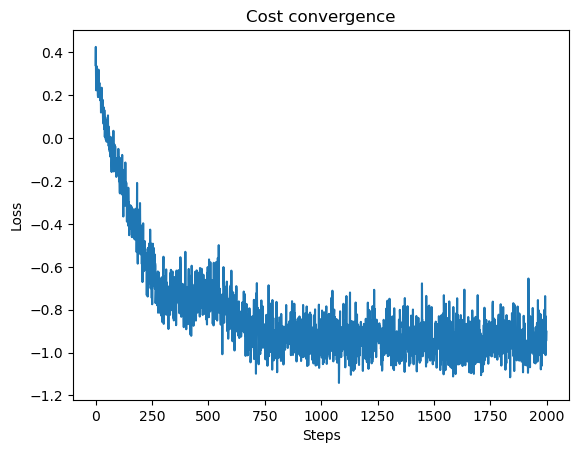

time: 78 ms (started: 2023-03-30 23:35:35 +09:00)


In [180]:
plt.plot(loss_history)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Cost convergence")

# plt.savefig('./img/OCC0/qsvdd/cost_qcnn.png')

In [181]:
# savetxt('./img/OCC0/qsvdd/param_list_qcnn',est_params.numpy(),delimiter=',')

time: 0 ns (started: 2023-03-30 23:35:35 +09:00)


Text(0.5, 1.0, 'Parameter convergence')

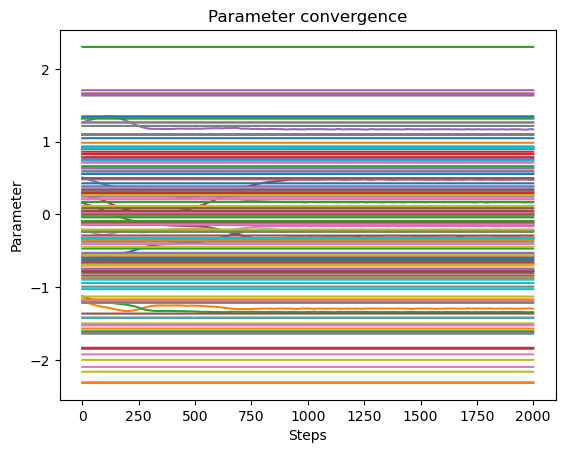

time: 156 ms (started: 2023-03-30 23:35:35 +09:00)


In [182]:
plt.plot(param_history)
plt.xlabel("Steps")
plt.ylabel("Parameter")
plt.title("Parameter convergence")
# plt.savefig('./img/OCC0/qsvdd/parameters_qcnn.png')

# test

In [185]:
import numpy as np
trained_params = est_params
conv_filter = 'U_VQOCC'
num_params_conv = 150
data_encoding = 'Amplitude'
cost_func = 'svdd'
meaasure_basis = 'Z'
# idx = random.sample(range(len(X_train)),100)

train_result = np.asarray([QCNN_circuit.QCNN(x, trained_params, U=conv_filter, U_params=num_params_conv, 
                                                 embedding_type=data_encoding,  
                                                 cost_fn=cost_func, measure_axis=meaasure_basis) for x in X_train])

time: 1h 11min 47s (started: 2023-03-30 23:35:39 +09:00)


In [191]:
center = np.mean(train_result, axis=0)
center_train = np.tile(center, (len(X_train),1))

time: 0 ns (started: 2023-03-31 00:47:27 +09:00)


In [192]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def radius(data, center):
    res = []
    for j in range(len(data)):
        res.append(sum(abs(data - center)[j]**2))
    return res
        

time: 0 ns (started: 2023-03-31 00:47:27 +09:00)


In [193]:
import numpy as np
trained_params = est_params
conv_filter = 'U_VQOCC'
num_params_conv = 78
data_encoding = 'Amplitude'
cost_func = 'svdd'
meaasure_basis = 'Z'
radius_nor = []
radius_ano = []


def test(ntrain):
    for i in range(10):
        if i == ntrain:
            filter = np.where(y_test == ntrain)
            test_data = x_test[filter]
            test_label = y_test[filter]

            pred = np.asarray([QCNN_circuit.QCNN(x, trained_params, U=conv_filter, U_params=num_params_conv, 
                                                 embedding_type=data_encoding,  
                                                 cost_fn=cost_func, measure_axis=meaasure_basis) for x in test_data])
            pred = pred[:,latent]

            for j in range(pred.shape[0]):
                sample = pred[j,:]
                # radius_nor.append(radius(data = sample, center = center_train)[0].numpy())
                radius_nor.append(radius(data = sample, center = center_train)[0])

        else:
            filter = np.where(y_test == i)
            test_data = x_test[filter]
            idx_test = random.sample(range(len(test_data)),100)
            test_data = test_data[idx_test]

            pred = np.asarray([QCNN_circuit.QCNN(x, trained_params, U=conv_filter, U_params=num_params_conv, 
                                                 embedding_type=data_encoding, 
                                                 cost_fn=cost_func, measure_axis=meaasure_basis) for x in test_data])
            pred = pred[:,latent]
            
            for j in range(pred.shape[0]):
                sample = pred[j,:]
                # radius_ano.append(radius(data = sample, center = center_train)[0].numpy())
                radius_ano.append(radius(data = sample, center = center_train)[0])

    y_pred_nor = radius_nor
    y_true_nor = np.zeros(len(radius_nor), dtype=int)
    y_pred_ano = radius_ano
    y_true_ano = np.ones(len(radius_ano), dtype=int)

    y_pred = np.concatenate((y_pred_nor,y_pred_ano),axis=None)
    y_true = np.concatenate((y_true_nor,y_true_ano),axis=None)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true,y_pred)
    
    return auc, y_pred, y_true, fpr, tpr

time: 16 ms (started: 2023-03-31 00:47:27 +09:00)


## AUC

In [194]:
auc, y_pred, y_true, fpr, tpr = test(ntrain)

time: 22min 23s (started: 2023-03-31 00:47:27 +09:00)


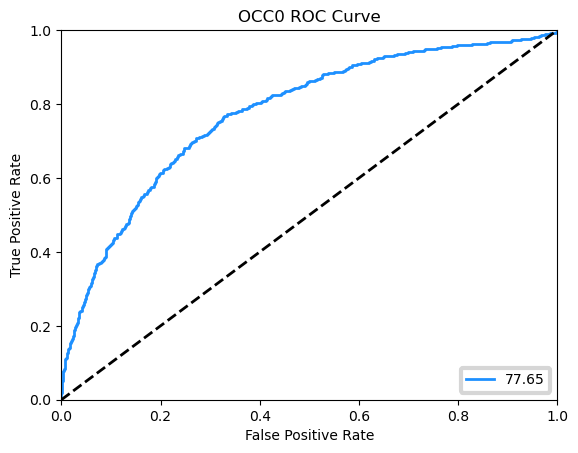

time: 47 ms (started: 2023-03-31 01:09:51 +09:00)


In [195]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='dodgerblue',lw=lw,label="{:.2f}".format(auc * 100))
plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("OCC0 ROC Curve")
plt.legend(loc="lower right")
# plt.savefig('./img/OCC0/qsvdd/OCC0_ROC_all.png')
plt.show()

In [196]:
import os

def save_auc_to_file(auc, file_name):
    auc = "{:.2f}".format(auc * 100)
    directory = os.path.dirname(file_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    if not os.path.exists(file_name):
        with open(file_name, 'w') as f:
            f.write("AUC Results\n")
    with open(file_name, 'a') as f:
        f.write(str(auc) + "\n")

# Example usage
save_auc_to_file(auc, "./result/auc_results0.txt")

time: 0 ns (started: 2023-03-31 01:09:51 +09:00)


In [197]:
print("{:.2f}".format(auc * 100))

77.65
time: 0 ns (started: 2023-03-31 01:09:51 +09:00)
